In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
aa=pd.read_excel("Assignment.xlsx")

In [2]:
xl = pd.ExcelFile('Assignment.xlsx').sheet_names
xl

['Payments', 'AR', 'Rating', 'ENQ', 'ACC Type', 'Table definition']

In [416]:
pay=pd.read_excel('Assignment.xlsx',sheet_name='Payments')
# ar =pd.read_excel('Assignment.xlsx',sheet_name='AR')
# rat=pd.read_excel('Assignment.xlsx',sheet_name='Rating')
# enq=pd.read_excel('Assignment.xlsx',sheet_name='ENQ')
# acc=pd.read_excel('Assignment.xlsx',sheet_name='ACC Type')
# td =pd.read_excel('Assignment.xlsx',sheet_name='Table definition')

pay

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID
0,106575,23,0.190152,male,self,33.0,hindu,12081.0
1,4142,50,0.162144,female,salaried,32.0,hindu,15211.0
2,61500,147,0.196540,male,self,37.0,hindu,7337.0
3,283816,6,0.160113,male,self,24.0,hindu,12490.0
4,81935,39,0.185615,male,salaried,38.0,hindu,13790.0
...,...,...,...,...,...,...,...,...
3736,10490,32,0.164189,male,salaried,32.0,hindu,2402.0
3737,25237,13,0.171330,male,salaried,29.0,hindu,9586.0
3738,42498,34,0.203349,male,self,27.0,hindu,1635.0
3739,302616,123,0.197603,male,self,64.0,muslim,17444.0


##### trying to understand the payments data better

In [424]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loanamount      3741 non-null   int64  
 1   Tenure of loan  3741 non-null   int64  
 2   yeild           3741 non-null   float64
 3   Gender          3681 non-null   object 
 4   Occupation      3681 non-null   object 
 5   Age             3681 non-null   float64
 6   Religion        3681 non-null   object 
 7   CUST_ID         3681 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 233.9+ KB


### The data seems to have missing values for a lot of columns for a few rows, let's check and drop these rows

In [425]:
# pay[pay['Age']=="False"]
pay[pd.isnull(pay['CUST_ID'])]

pay.dropna(how='any',inplace=True)

In [426]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 3740
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loanamount      3681 non-null   int64  
 1   Tenure of loan  3681 non-null   int64  
 2   yeild           3681 non-null   float64
 3   Gender          3681 non-null   object 
 4   Occupation      3681 non-null   object 
 5   Age             3681 non-null   float64
 6   Religion        3681 non-null   object 
 7   CUST_ID         3681 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 258.8+ KB


### Now, trying to understand each variable one by one

In [8]:
pay.describe()

,loanamount,Tenure of loan,yeild,Age,CUST_ID
count,3.681000e+03,3681.000000,3681.000000,3681.000000,3681.000000
mean,1.201222e+05,57.787558,0.165949,37.583537,9000.884271
std,1.908911e+05,41.047507,0.029896,19.287108,5325.508104
min,1.140000e+02,1.000000,0.100051,0.000000,3.000000
25%,2.363900e+04,23.000000,0.155198,30.000000,4185.000000
50%,5.900000e+04,49.000000,0.165969,35.000000,8878.000000
75%,1.305470e+05,86.000000,0.192320,43.000000,13401.000000
max,2.480000e+06,182.000000,0.229197,1052.000000,18487.000000


In [9]:
pay.describe(include=['O'])

,Gender,Occupation,Religion
count,3681,3681,3681
unique,2,3,4
top,male,self,hindu
freq,2761,2339,3330


In [10]:
pay.corr()

,loanamount,Tenure of loan,yeild,Age,CUST_ID
loanamount,1.000000,0.197473,-0.223161,0.073767,0.059093
Tenure of loan,0.197473,1.000000,0.117608,0.028278,-0.015973
yeild,-0.223161,0.117608,1.000000,-0.048447,-0.051901
Age,0.073767,0.028278,-0.048447,1.000000,0.064643
CUST_ID,0.059093,-0.015973,-0.051901,0.064643,1.000000


<Figure size 1080x360 with 0 Axes>

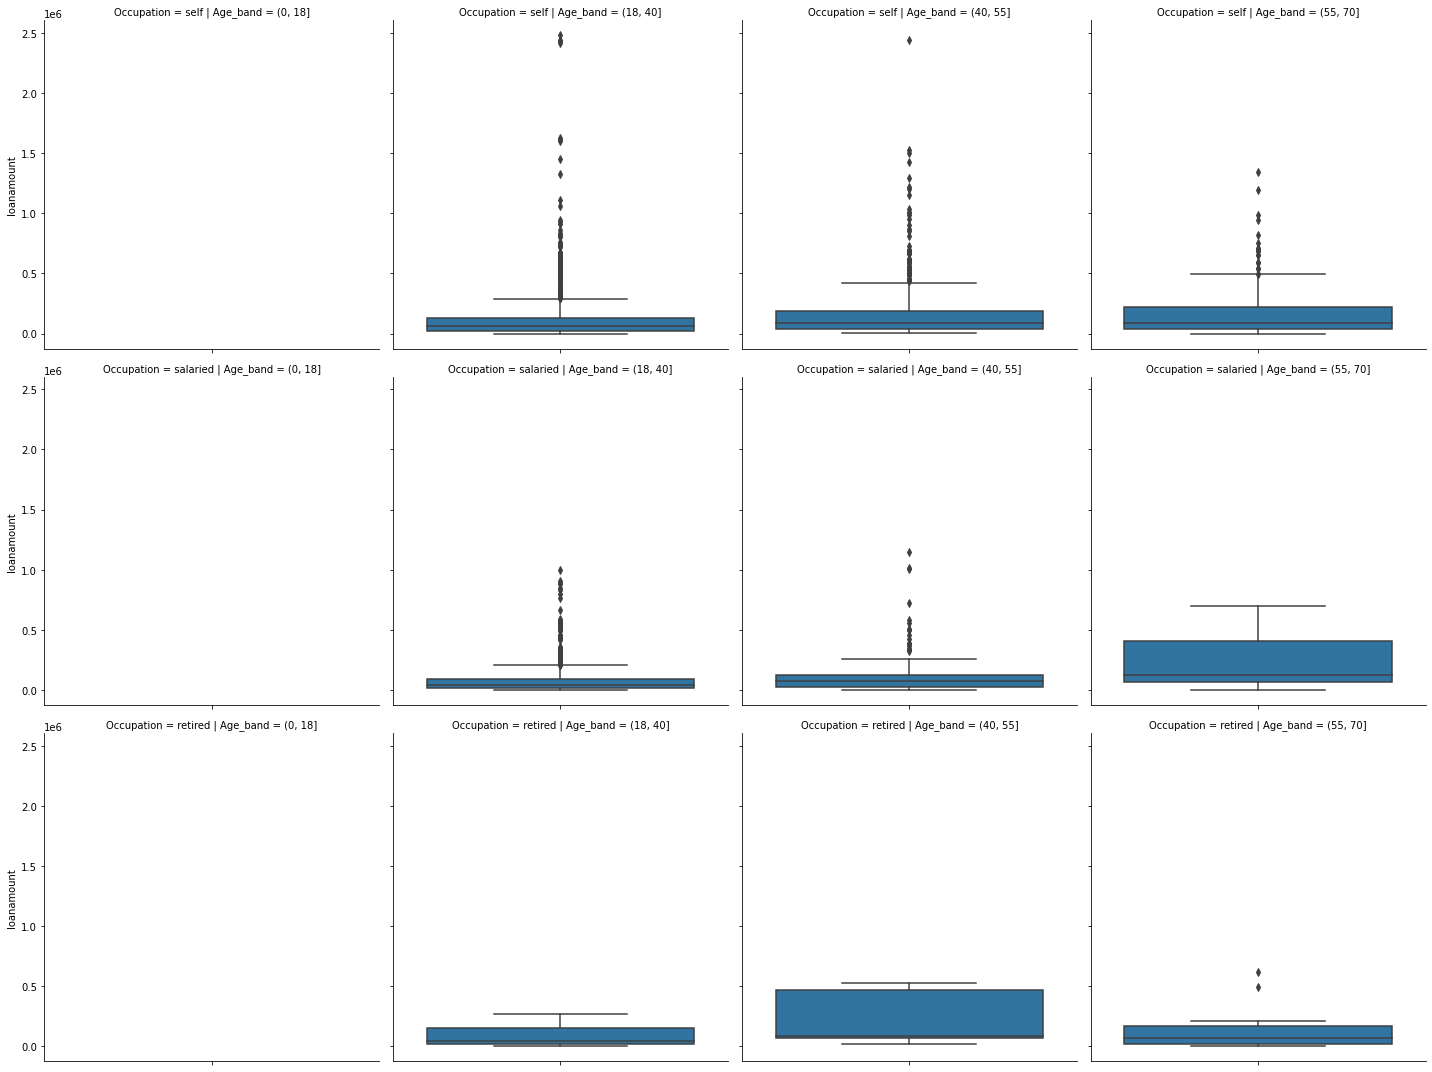

In [446]:
pay.loc[pay['Age']<0,'Age2']=0
pay.loc[(pay['Age']<70)&(pay['Age']>=0),'Age2']=pay['Age']
pay.loc[pay['Age']>=70,'Age2']=70

pay['Age2'].describe(), pay['Age'].describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99])

pay['Age_band']=pd.cut(pay['Age2'], bins=[0,18,40,55,70])

pay.columns

plt.figure(figsize=(15,5))
sns.catplot(data=pay,row='Occupation',y='loanamount', col='Age_band', kind='box',ci=False)
plt.show()

<AxesSubplot:xlabel='loanlog', ylabel='Count'>

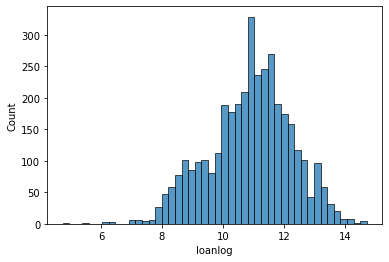

In [77]:
pay['loanlog']=np.log(pay['loanamount'])
sns.histplot(pay['loanlog'])

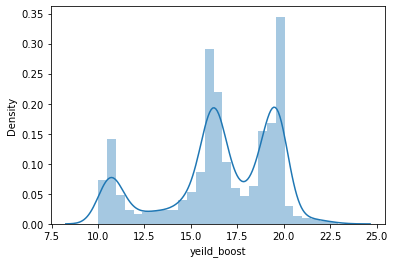

In [45]:
pay['yeild_boost']=pay['yeild']*100
yeild_plot=sns.distplot(pay['yeild_boost'])
plt.show()

In [204]:
pay.head()

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band,loanlog,yeild_boost
0,106575,23,0.190152,male,self,33.0,hindu,12081.0,"(18, 40]",11.576604,19.015186
1,4142,50,0.162144,female,salaried,32.0,hindu,15211.0,"(18, 40]",8.328934,16.214389
2,61500,147,0.196540,male,self,37.0,hindu,7337.0,"(18, 40]",11.026792,19.654001
3,283816,6,0.160113,male,self,24.0,hindu,12490.0,"(18, 40]",12.556081,16.011254
4,81935,39,0.185615,male,salaried,38.0,hindu,13790.0,"(18, 40]",11.313682,18.561461


In [216]:
pay['Tenure bkt']=pd.qcut(pay['Tenure of loan'], 5)
pay['Age bkt']=pd.qcut(pay['Age'], 5)
pay['Loan bkt']=pd.qcut(pay['loanamount'], 5)
pay['Tenure bkt']=pd.qcut(pay['Tenure of loan'], 5)
pay['Yeild bkt']=pd.qcut(pay['yeild'], 5)


pay.head()
# pvt1=pd.pivot_table(data=pay, index=)

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band,loanlog,yeild_boost,Tenure bkt,Age bkt,Loan bkt,Yeild bkt
0,106575,23,0.190152,male,self,33.0,hindu,12081.0,"(18, 40]",11.576604,19.015186,"(19.0, 38.0]","(29.0, 34.0]","(82102.0, 167100.0]","(0.178, 0.196]"
1,4142,50,0.162144,female,salaried,32.0,hindu,15211.0,"(18, 40]",8.328934,16.214389,"(38.0, 63.0]","(29.0, 34.0]","(113.999, 18572.0]","(0.162, 0.178]"
2,61500,147,0.196540,male,self,37.0,hindu,7337.0,"(18, 40]",11.026792,19.654001,"(93.0, 182.0]","(34.0, 38.0]","(44500.0, 82102.0]","(0.196, 0.229]"
3,283816,6,0.160113,male,self,24.0,hindu,12490.0,"(18, 40]",12.556081,16.011254,"(0.999, 19.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.146, 0.162]"
4,81935,39,0.185615,male,salaried,38.0,hindu,13790.0,"(18, 40]",11.313682,18.561461,"(38.0, 63.0]","(34.0, 38.0]","(44500.0, 82102.0]","(0.178, 0.196]"


In [221]:
pay[['Loan bkt']].value_counts()

Loan bkt             
(113.999, 18572.0]       737
(18572.0, 44500.0]       737
(82102.0, 167100.0]      736
(167100.0, 2480000.0]    736
(44500.0, 82102.0]       735
dtype: int64

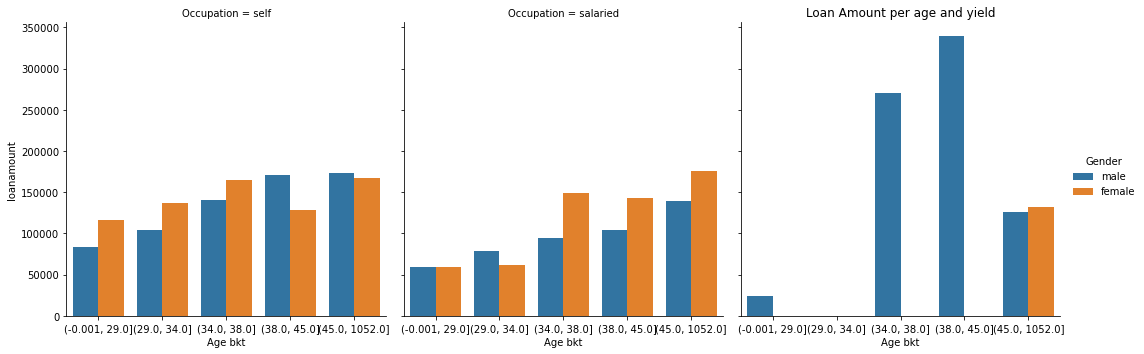

<Figure size 1440x720 with 0 Axes>

In [236]:
plt1=sns.catplot(x='Age bkt', y='loanamount', hue='Gender', col='Occupation', kind='bar', data=pay, ci=None)
plt.title("Loan Amount per age and yield")
plt.figure(figsize=(20,10))

plt.show()

In [246]:
pay.loc[pay['Age']<1,'Age2']=5
pay.loc[pay['Age']>1,'Age2']=pay['Age']
pay[pay['Age']<25]

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band,loanlog,yeild_boost,Tenure bkt,Age bkt,Loan bkt,Yeild bkt,Age2
3,283816,6,0.160113,male,self,24.0,hindu,12490.0,"(18, 40]",12.556081,16.011254,"(0.999, 19.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.146, 0.162]",24.0
25,184500,51,0.183829,male,self,23.0,hindu,4548.0,"(18, 40]",12.125405,18.382858,"(38.0, 63.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.178, 0.196]",23.0
31,6025,23,0.165939,female,self,24.0,hindu,10830.0,"(18, 40]",8.703673,16.593902,"(19.0, 38.0]","(-0.001, 29.0]","(113.999, 18572.0]","(0.162, 0.178]",24.0
42,210500,36,0.192133,female,self,23.0,hindu,12491.0,"(18, 40]",12.257241,19.213315,"(19.0, 38.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.178, 0.196]",23.0
48,68573,7,0.160444,female,salaried,24.0,hindu,5306.0,"(18, 40]",11.135654,16.044424,"(0.999, 19.0]","(-0.001, 29.0]","(44500.0, 82102.0]","(0.146, 0.162]",24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,716497,9,0.106866,male,self,22.0,hindu,1017.0,"(18, 40]",13.482129,10.686561,"(0.999, 19.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.099, 0.146]",22.0
3692,24669,8,0.160905,male,self,19.0,hindu,1436.0,"(18, 40]",10.113303,16.090539,"(0.999, 19.0]","(-0.001, 29.0]","(18572.0, 44500.0]","(0.146, 0.162]",19.0
3698,65604,49,0.114112,female,self,20.0,hindu,3377.0,"(18, 40]",11.091392,11.411232,"(38.0, 63.0]","(-0.001, 29.0]","(44500.0, 82102.0]","(0.099, 0.146]",20.0
3732,73000,38,0.197632,female,salaried,22.0,hindu,18173.0,"(18, 40]",11.198215,19.763158,"(19.0, 38.0]","(-0.001, 29.0]","(44500.0, 82102.0]","(0.196, 0.229]",22.0


In [260]:
pay[['Age2','CUST_ID']]=pay[['Age2','CUST_ID']].astype(int)
pay[['loanlog','yeild_boost']]=round(pay[['loanlog','yeild_boost']],2)
pay

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band,loanlog,yeild_boost,Tenure bkt,Age bkt,Loan bkt,Yeild bkt,Age2
0,106575,23,0.190152,male,self,33.0,hindu,12081,"(18, 40]",11.58,19.02,"(19.0, 38.0]","(29.0, 34.0]","(82102.0, 167100.0]","(0.178, 0.196]",33
1,4142,50,0.162144,female,salaried,32.0,hindu,15211,"(18, 40]",8.33,16.21,"(38.0, 63.0]","(29.0, 34.0]","(113.999, 18572.0]","(0.162, 0.178]",32
2,61500,147,0.196540,male,self,37.0,hindu,7337,"(18, 40]",11.03,19.65,"(93.0, 182.0]","(34.0, 38.0]","(44500.0, 82102.0]","(0.196, 0.229]",37
3,283816,6,0.160113,male,self,24.0,hindu,12490,"(18, 40]",12.56,16.01,"(0.999, 19.0]","(-0.001, 29.0]","(167100.0, 2480000.0]","(0.146, 0.162]",24
4,81935,39,0.185615,male,salaried,38.0,hindu,13790,"(18, 40]",11.31,18.56,"(38.0, 63.0]","(34.0, 38.0]","(44500.0, 82102.0]","(0.178, 0.196]",38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,10490,32,0.164189,male,salaried,32.0,hindu,2402,"(18, 40]",9.26,16.42,"(19.0, 38.0]","(29.0, 34.0]","(113.999, 18572.0]","(0.162, 0.178]",32
3737,25237,13,0.171330,male,salaried,29.0,hindu,9586,"(18, 40]",10.14,17.13,"(0.999, 19.0]","(-0.001, 29.0]","(18572.0, 44500.0]","(0.162, 0.178]",29
3738,42498,34,0.203349,male,self,27.0,hindu,1635,"(18, 40]",10.66,20.33,"(19.0, 38.0]","(-0.001, 29.0]","(18572.0, 44500.0]","(0.196, 0.229]",27
3739,302616,123,0.197603,male,self,64.0,muslim,17444,"(55, 70]",12.62,19.76,"(93.0, 182.0]","(45.0, 1052.0]","(167100.0, 2480000.0]","(0.196, 0.229]",64


In [379]:
paygrp=pay.groupby(['Gender','Occupation','Religion']).agg({'loanamount':['sum','mean','count','nunique'],'Tenure of loan':'sum'}).unstack()
payp    vt=pd.pivot_table(data=pay,index=['Gender','Occupation'], columns='Religion', values=['loanamount','Age'], aggfunc={'loanamount':['sum','mean','count','nunique'], 'Age':'mean'})
paypvt.fillna(0, inplace=True)
paypvt.sort_index(ascending=False, inplace=True)
paypvt
paygrp.fillna(0, inplace=True)
paygrp.sort_index(ascending=False)
paygrp
paypvt

Age                             loanamount          \
                       mean                                  count           
Religion          christian      hindu     muslim other  christian   hindu   
Gender Occupation                                                            
male   self         40.3000  38.411421  38.016807  30.0       30.0  1541.0   
       salaried     34.4500  34.483770  32.107692  26.0       20.0   955.0   
       retired       0.0000  55.884615   0.000000   0.0        0.0    26.0   
female self         44.9375  41.561404  38.133333   0.0       16.0   570.0   
       salaried     35.3000  34.459574  29.576923   0.0       10.0   235.0   
       retired       0.0000  66.666667   0.000000   0.0        0.0     3.0   

                                                                             \
                                         mean                                 
Religion          muslim other      christian          hindu         muslim   
Gender Occupation                                                             
male   self        119.0   3.0  116810.266667  137402.843608  129763.596639   
       salaried     65.0   2.0   69586.450000   85176.149738   87467.815385   
       retired       0.0   0.0       0.000000  148344.730769       0.000000   
female self         60.0   0.0   51207.500000  147745.536842  123571.900000   
       salaried     26.0   0.0  122134.800000   98784.089362   63118.384615   
       retired       0.0   0.0       0.000000  132499.333333       0.000000   

                                                                           \
                                  nunique                             sum   
Religion                  other christian   hindu muslim other  christian   
Gender Occupation                                                           
male   self        46251.666667      30.0  1429.0  116.0   3.0  3504308.0   
       salaried    73500.000000      20.0   850.0   63.0   2.0  1391729.0   
       retired         0.000000       0.0    26.0    0.0   0.0        0.0   
female self            0.000000      16.0   536.0   56.0   0.0   819320.0   
       salaried        0.000000      10.0   224.0   26.0   0.0  1221348.0   
       retired         0.000000       0.0     3.0    0.0   0.0        0.0   

                                                      
                                                      
Religion                 hindu      muslim     other  
Gender Occupation                                     
male   self        211737782.0  15441868.0  138755.0  
       salaried     81343223.0   5685408.0  147000.0  
       retired       3856963.0         0.0       0.0  
female self         84214956.0   7414314.0       0.0  
       salaried     23214261.0   1641078.0       0.0  
       retired        397498.0         0.0       0.0

In [321]:
pay.rename(columns={'gender':'Gender','occupat':'Occupation'}, inplace=True)
pay

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band
0,106575,23,0.190152,male,self,33.0,hindu,12081.0,"(18, 40]"
1,4142,50,0.162144,female,salaried,32.0,hindu,15211.0,"(18, 40]"
2,61500,147,0.196540,male,self,37.0,hindu,7337.0,"(18, 40]"
3,283816,6,0.160113,male,self,24.0,hindu,12490.0,"(18, 40]"
4,81935,39,0.185615,male,salaried,38.0,hindu,13790.0,"(18, 40]"
...,...,...,...,...,...,...,...,...,...
3736,10490,32,0.164189,male,salaried,32.0,hindu,2402.0,"(18, 40]"
3737,25237,13,0.171330,male,salaried,29.0,hindu,9586.0,"(18, 40]"
3738,42498,34,0.203349,male,self,27.0,hindu,1635.0,"(18, 40]"
3739,302616,123,0.197603,male,self,64.0,muslim,17444.0,"(55, 70]"


In [338]:
ar.describe()

,CUST_ID,ACCT_TYPE_CD,ACTUAL_PAYMENT_AM,BALANCE_AM,CHARGE_OFF_AM,CREDIT_LIMIT_AM,DAYS_PAST_DUE,ORIG_LOAN_AM,PAST_DUE_AM,SUIT_FILED_WILLFUL_DFLT,...,DAYS_PAST_DUE_16,DAYS_PAST_DUE_17,DAYS_PAST_DUE_18,DAYS_PAST_DUE_19,DAYS_PAST_DUE_20,DAYS_PAST_DUE_21,DAYS_PAST_DUE_22,DAYS_PAST_DUE_23,DAYS_PAST_DUE_24,MaxDayaPastDue
count,40232.000000,40259.000000,7.396000e+03,3.979300e+04,3.772000e+03,3.840500e+04,36475.000000,3.985600e+04,3.468700e+04,7264.000000,...,9602.000000,9248.000000,8518.000000,8296.000000,7911.000000,7745.000000,7496.000000,6965.000000,7093.000000,40259.000000
mean,9552.102754,174.665441,7.951761e+04,9.658142e+04,2.368161e+04,1.962375e+05,12.423989,1.921911e+05,5.523942e+03,2.442318,...,34.944178,35.043253,35.544142,33.835945,35.666035,36.081730,34.308031,38.934386,36.984351,20.707270
std,5190.207820,145.752358,5.616539e+05,7.724106e+05,2.414969e+05,9.260489e+05,86.205953,9.096304e+05,1.301557e+05,22.148796,...,154.968261,155.621317,156.418582,153.338928,158.871649,159.672986,154.716631,166.304798,162.269161,103.442831
min,3.000000,5.000000,-5.200000e+03,-2.542998e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5093.000000,123.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,0.000000,2.000000e+04,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9857.000000,191.000000,9.228000e+03,0.000000e+00,0.000000e+00,5.025000e+04,0.000000,5.132150e+04,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13978.000000,191.000000,4.100000e+04,2.838800e+04,0.000000e+00,1.310020e+05,0.000000,1.270230e+05,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18487.000000,999.000000,3.748612e+07,6.990284e+07,1.234096e+07,7.000000e+07,999.000000,7.000000e+07,1.785640e+07,209.000000,...,999.000000,999.000000,999.000000,998.000000,998.000000,900.000000,991.000000,993.000000,929.000000,999.000000


In [325]:
pay.shape,ar.shape,rat.shape

((3741, 9), (40259, 169), (2037, 2))

In [372]:

ar['ORIG_LOAN_AM']=ar['ORIG_LOAN_AM'].fillna(0)
ar['ORIG_LOAN_AM']=ar['ORIG_LOAN_AM'].astype(int)

pay['newkey']=round(pay['loanamount'],1).astype(str)+pay['CUST_ID'].astype(str)
ar['newkey']=round(ar['ORIG_LOAN_AM'],1).astype(str)+ar['CUST_ID'].astype(str)

ar_sub=ar[['CUST_ID','ORIG_LOAN_AM','newkey']]
ar_sub[ar_sub['CUST_ID']==12081]
# pay_sub=pay[['CUST_ID','loanamount','newkey']]
# pay_sub[pay_sub['CUST_ID']==12081]

# df12_sub=df12[['CUST_ID','ORIG_LOAN_AM','newkey_x','newkey_y']]
# df12_sub[df12_sub['CUST_ID']==12081]

,CUST_ID,ORIG_LOAN_AM,newkey_x,newkey_y
0,12081.0,NaN,10657512081.0,NaN
125,12081.0,NaN,1437712081.0,NaN
3663,12081.0,NaN,1342512081.0,NaN


In [381]:
ar_sub=ar[['CUST_ID','ORIG_LOAN_AM','newkey']][ar['CUST_ID']==12081]
ar_sub
# ar_sub[ar_sub['CUST_ID']==12081]

,CUST_ID,ORIG_LOAN_AM,newkey
25619,12081.0,43919,4391912081.0
25620,12081.0,17280,1728012081.0
25621,12081.0,148793,14879312081.0
25622,12081.0,149772,14977212081.0
25623,12081.0,116344,11634412081.0
25624,12081.0,337081,33708112081.0
25625,12081.0,133720,13372012081.0
25626,12081.0,247230,24723012081.0
25627,12081.0,316187,31618712081.0
25628,12081.0,318266,31826612081.0


In [361]:
df12=pd.merge(left=pay, right=ar, how='left', left_on=['CUST_ID','loanamount'], right_on=['CUST_ID','ORIG_LOAN_AM'], validate='many_to_many')
df12

,loanamount,Tenure of loan,yeild,Gender,Occupation,Age,Religion,CUST_ID,Age_band,newkey_x,...,DAYS_PAST_DUE_17,DAYS_PAST_DUE_18,DAYS_PAST_DUE_19,DAYS_PAST_DUE_20,DAYS_PAST_DUE_21,DAYS_PAST_DUE_22,DAYS_PAST_DUE_23,DAYS_PAST_DUE_24,MaxDayaPastDue,newkey_y
0,106575,23,0.190152,male,self,33.0,hindu,12081.0,"(18, 40]",10657512081.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4142,50,0.162144,female,salaried,32.0,hindu,15211.0,"(18, 40]",414215211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,414215211.0
2,61500,147,0.196540,male,self,37.0,hindu,7337.0,"(18, 40]",615007337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,615007337.0
3,283816,6,0.160113,male,self,24.0,hindu,12490.0,"(18, 40]",28381612490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,81935,39,0.185615,male,salaried,38.0,hindu,13790.0,"(18, 40]",8193513790.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,10490,32,0.164189,male,salaried,32.0,hindu,2402.0,"(18, 40]",104902402.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,104902402.0
3822,25237,13,0.171330,male,salaried,29.0,hindu,9586.0,"(18, 40]",252379586.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,252379586.0
3823,42498,34,0.203349,male,self,27.0,hindu,1635.0,"(18, 40]",424981635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3824,302616,123,0.197603,male,self,64.0,muslim,17444.0,"(55, 70]",30261617444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
pay.describe()

pay['Age'].fillna(0, inplace=True)
pay['Gender'].fillna('check', inplace=True)
pay['Occupation'].fillna('no data', inplace=True)



pay[pd.isnull(pay['CUST_ID'])]

check    3741
Name: Gender, dtype: int64

In [423]:
paygrp['sum_by_religion']=pay.groupby('Religion').loanamount.transform(np.mean)
paygrp

loanamount                              Tenure of loan  \
                 sum           mean count nunique            sum   
Religion                                                           
christian    6936705   91272.434211    76      76           4547   
hindu      404764683  121550.955856  3330    2890         191166   
muslim      30182668  111787.659259   270     254          16758   
other         285755   57151.000000     5       5            245   

          sum_by_religion  
                           
Religion                   
christian             NaN  
hindu                 NaN  
muslim                NaN  
other                 NaN

In [ ]:
paypvt=pd.pivot_table(data=pay,index=['Gender','Occupation'], columns='Religion', values=['loanamount','Age'], aggfunc={'loanamount':['sum','mean','count','nunique'], 'Age':'mean'})
paypvt.fillna(0, inplace=True)
paypvt.sort_index(ascending=False, inplace=True)
paypvt
paygrp.fillna(0, inplace=True)
paygrp.sort_index(ascending=False)
paygrp
paypvt